# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime
from api_keys import weather_api_key


# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
# url =f"https://api.openweathermap.org/data/3.0/onecall?lat=33.44&lon=-94.04&appid={api_keys}"

url = "http://api.openweathermap.org/data/2.5/weather?"

# # Define an empty list to fetch the weather data for each city
city_data = []

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     # # Create endpoint URL with each city
    # city_url = url + "appid=" + api_keys + "&q=" + city + "&units=metric"
    # city_url = f"{url}appid={api_keys}&q={city}&units=metric"
# city_url =f"{url}&units=metric&appid={api_keys}"
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()


     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # time.sleep(10)          

# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | obo
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | karoi
Processing Record 7 of Set 1 | markovo
Processing Record 8 of Set 1 | kokstad
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | puerto baquerizo moreno
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | manadhoo
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | bandon
Processing 

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,5.43,51,88,1.84,RU,1717873322
1,grytviken,-54.2811,-36.5092,-2.47,86,100,3.45,GS,1717873256
2,ribeira grande,38.5167,-28.7000,21.22,83,40,6.69,PT,1717873284
3,obo,5.3998,26.4869,21.72,87,44,1.97,CF,1717873425
4,bilibino,68.0546,166.4372,6.28,48,0,1.50,RU,1717873264


In [27]:
# Create the output directory if it doesn't exist
output_directory = 'output_data'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,5.43,51,88,1.84,RU,1717873322
1,grytviken,-54.2811,-36.5092,-2.47,86,100,3.45,GS,1717873256
2,ribeira grande,38.5167,-28.7000,21.22,83,40,6.69,PT,1717873284
3,obo,5.3998,26.4869,21.72,87,44,1.97,CF,1717873425
4,bilibino,68.0546,166.4372,6.28,48,0,1.50,RU,1717873264


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

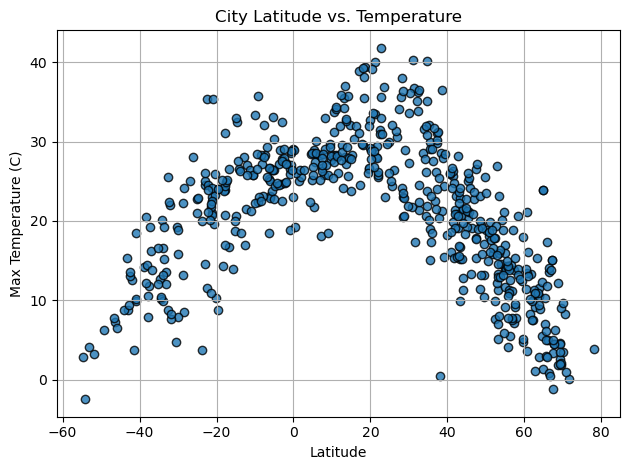

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

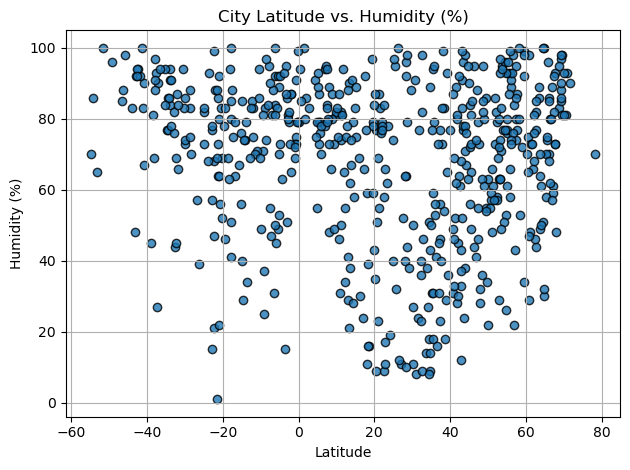

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

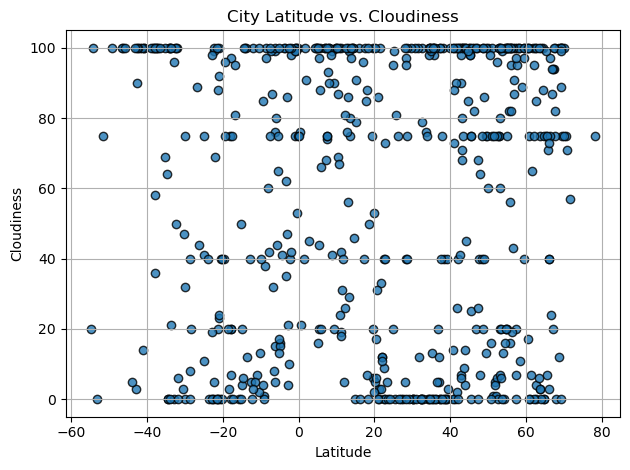

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

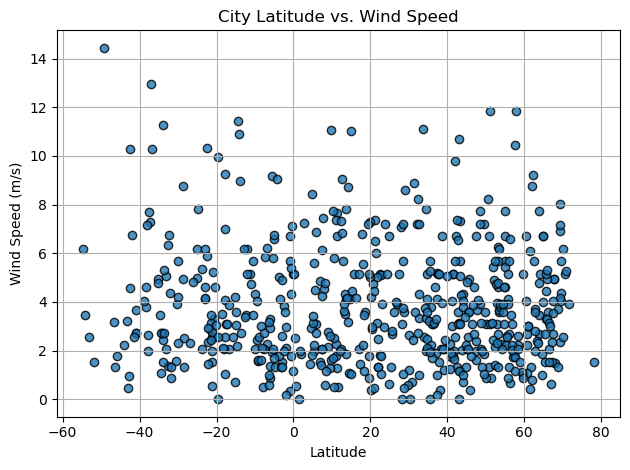

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,5.43,51,88,1.84,RU,1717873322
2,ribeira grande,38.5167,-28.7000,21.22,83,40,6.69,PT,1717873284
3,obo,5.3998,26.4869,21.72,87,44,1.97,CF,1717873425
4,bilibino,68.0546,166.4372,6.28,48,0,1.50,RU,1717873264
6,markovo,57.3206,107.0881,7.16,80,20,1.79,RU,1717873426


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-2.47,86,100,3.45,GS,1717873256
5,karoi,-16.8099,29.6925,16.67,64,81,2.05,ZW,1717873426
7,kokstad,-30.5472,29.4241,4.71,94,3,1.55,ZA,1717873426
9,blackmans bay,-43.0167,147.3167,8.74,92,3,0.45,AU,1717873264
11,puerto baquerizo moreno,-0.9000,-89.6000,26.55,69,75,6.69,EC,1717873302


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7861999948721745


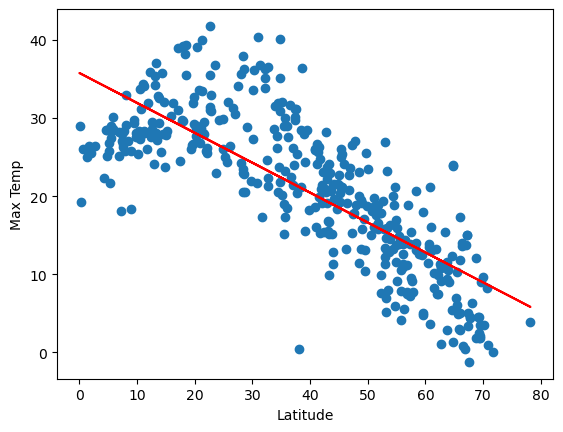

In [37]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7690946542304042


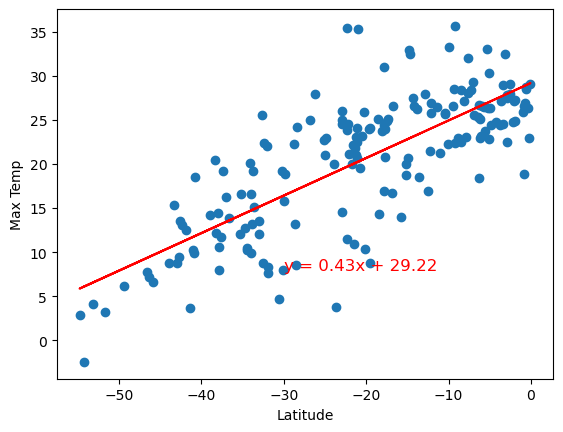

In [38]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))


**Discussion about the linear relationship:** 
Observations about linear relationship:
The regression displays a pretty strong negative correlation between temperature and latitude
in the northern hemisphere, as the latitude increases so does the distance from the equator increases
When you move further away from the equator, the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10201571585267605


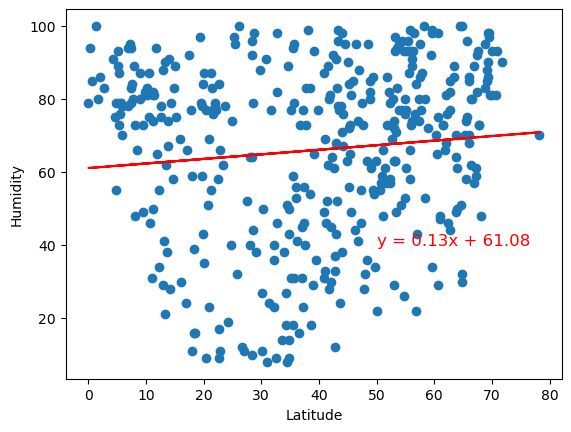

In [39]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))


The r-value is: -0.14997630342544255


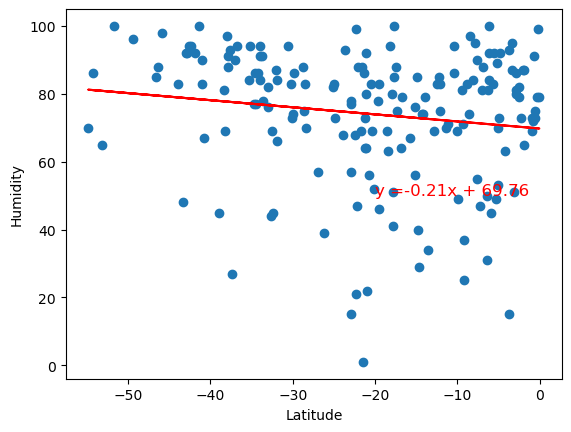

In [40]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))


**Discussion about the linear relationship:** 
The relationship is slightly positive on the Northern Hemisphere
Humidity increases as cities get closer to the equator

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02094946139985747


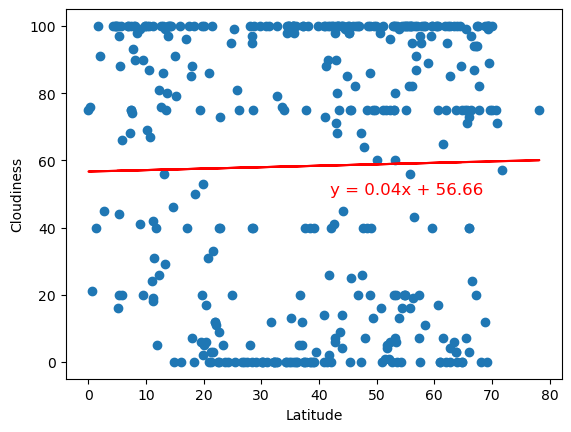

In [41]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))


The r-value is: -0.09329357131942226


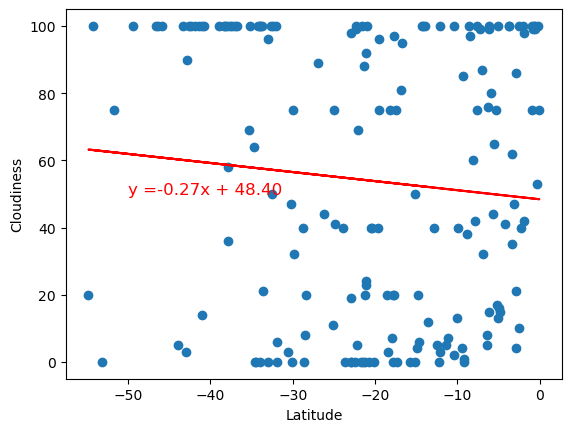

In [42]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))


**Discussion about the linear relationship:** 
There is no correlation between latitude and cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.010247646983703357


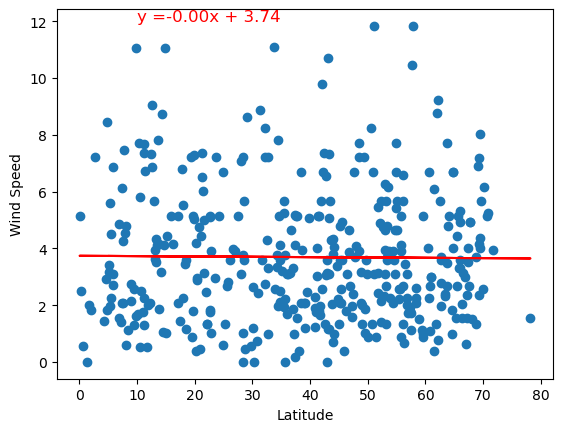

In [43]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))


The r-value is: -0.12491955493257834


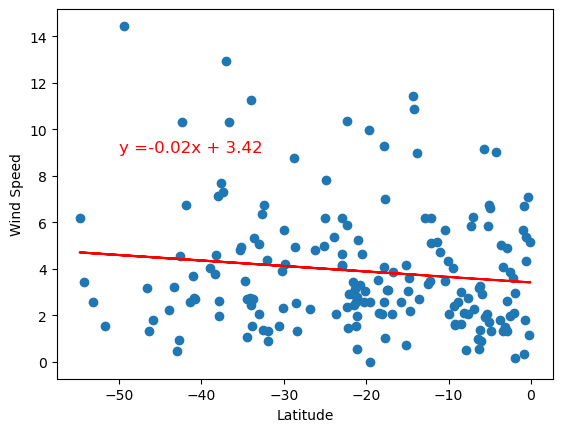

In [44]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))


**Discussion about the linear relationship:** 
There is no correlation between latitude and wind speed.
